In [37]:
# imports
import pandas as pd
import numpy as np
from label_utils import *
from ModelTester import ModelTester

%load_ext autoreload
%autoreload 2


# making all pandas columns visable with display command
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading in the data

In [2]:
data = pd.read_csv("merged_data_ver_1.1.csv", index_col=0)
data.head()

,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,country,league,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribbling,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribbling,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,home_win_last_3_matches,home_draw_last_3_matches,away_win_last_3_matches,away_draw_last_3_matches,home_win_last_5_matches,home_draw_last_5_matches,away_win_last_5_matches,away_draw_last_5_matches,home_win_last_10_matches,home_draw_last_10_matches,away_win_last_10_matches,away_draw_last_10_matches,home_win_last_20_matches,home_draw_last_20_matches,away_win_last_20_matches,away_draw_last_20_matches
0,1,1,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.30,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.0,1.65,3.4,4.5,1.78,3.25,4.00,1.73,3.40,4.2,Belgium,Belgium Jupiler League,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2
1,1,1,1.75,3.50,4.33,1.80,3.40,3.95,1.70,3.3,4.0,1.72,3.40,4.00,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.4,4.0,1.80,3.3,4.0,1.90,3.25,3.75,1.83,3.30,3.8,Belgium,Belgium Jupiler League,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2
2,2,1,1.91,3.30,3.75,1.91,3.30,3.70,1.90,3.2,3.4,1.91,3.20,3.50,NaN,NaN,NaN,1.83,3.30,4.00,2.00,3.3,3.8,1.80,3.3,3.8,1.95,3.25,3.50,NaN,NaN,NaN,Belgium,Belgium Jupiler League,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2
3,2,2,2.00,3.25,3.50,2.10,3.20,3.20,2.00,3.1,3.2,2.00,3.20,3.20,NaN,NaN,NaN,1.90,3.25,3.50,2.10,3.3,3.4,2.10,3.3,3.1,2.00,3.20,3.50,2.00,3.25,3.3,Belgium,Belgium Jupiler League,65,Balanced,NaN,Little,60,Mixed,Organised,60,Normal,40,Normal,50,Normal,Organised,70,High,60,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,0.333333,0.666667,0.0,0.333333,0.4,0.4,0.0,0.2,0.5,0.3,0.2,0.3,0.50,0.25,0.45,0.2
4,4,0,1.91,3.30,3.80,1.95,3.25,3.55,2.10,3.2,2.9,1.91,3.25,3.40,NaN,NaN,NaN,2.00,3.30,3.40,2.05,3.3,3.6,1.90,3.3,3.6,2.05,3.25,3.30,2.00,3.25,3.3,Belgium,Belgium Jupiler League,65,Balanced,NaN,Little,60,Mixed,Organised,60,Normal,40,Normal,50,Normal,Organised,70,High,60,Press,70,Wide,Cover,35,Balanced,NaN,Little,3

In [3]:
data = process_data(data)
data.head()

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,home_win_last_3_matches,home_draw_last_3_matches,away_win_last_3_matches,away_draw_last_3_matches,home_win_last_5_matches,home_draw_last_5_matches,away_win_last_5_matches,away_draw_last_5_matches,home_win_last_10_matches,home_draw_last_10_matches,away_win_last_10_matches,away_draw_last_10_matches,home_win_last_20_matches,home_draw_last_20_matches,away_win_last_20_matches,away_draw_last_20_matches,label
0,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.30,3.75,1.70,3.30,4.33,1.90,3.3,4.0,1.65,3.4,4.5,1.78,3.25,4.00,1.730000,3.400000,4.200000,45,0,-1,45,0,1,50,0,35,0,60,0,1,70,1,65,0,70,1,-1,35,0,-1,35,0,1,45,0,40,0,50,0,1,70,1,70,1,70,1,-1,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2,0
1,1.75,3.50,4.33,1.80,3.40,3.95,1.70,3.3,4.0,1.72,3.40,4.00,1.70,3.30,4.33,1.90,3.4,4.0,1.80,3.3,4.0,1.90,3.25,3.75,1.830000,3.300000,3.800000,45,0,-1,45,0,1,50,0,35,0,60,0,1,70,1,65,0,70,1,-1,35,0,-1,35,0,1,45,0,40,0,50,0,1,70,1,70,1,70,1,-1,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2,0
2,1.91,3.30,3.75,1.91,3.30,3.70,1.90,3.2,3.4,1.91,3.20,3.50,1.83,3.30,4.00,2.00,3.3,3.8,1.80,3.3,3.8,1.95,3.25,3.50,2.496387,3.660613,4.403196,45,0,-1,45,0,1,50,0,35,0,60,0,1,70,1,65,0,70,1,-1,35,0,-1,35,0,1,45,0,40,0,50,0,1,70,1,70,1,70,1,-1,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2,-1
3,2.00,3.25,3.50,2.10,3.20,3.20,2.00,3.1,3.2,2.00,3.20,3.20,1.90,3.25,3.50,2.10,3.3,3.4,2.10,3.3,3.1,2.00,3.20,3.50,2.000000,3.250000,3.300000,65,0,-1,60,0,1,60,0,40,0,50,0,1,70,1,60,0,70,1,-1,35,0,-1,35,0,1,45,0,40,0,50,0,1,70,1,70,1,70,1,-1,0.333333,0.666667,0.0,0.333333,0.4,0.4,0.0,0.2,0.5,0.3,0.2,0.3,0.50,0.25,0.45,0.2,0
4,1.91,3.30,3.80,1.95,3.25,3.55,2.10,3.2,2.9,1.91,3.25,3.40,2.00,3.30,3.40,2.05,3.3,3.6,1.90,3.3,3.6,2.05,3.25,3.30,2.000000,3.250000,3.300000,65,0,-1,60,0,1,60,0,40,0,50,0,1,70,1,60,0,70,1,-1,35,0,-1,35,0,1,45,0,40,0,50,0,1,70,1,70,1,70,1,-1,0.333333,0.666667,0.0,0.333333,0.4,0.4,0.0,0.2,0.5,0.3,0.2,0.3,0.50,0.25,0.45,0.2,-1


In [4]:
x_train, y_train, x_test, y_test, train_bet, test_bet = split_data(data)
x_train.head()

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,home_win_last_3_matches,home_draw_last_3_matches,away_win_last_3_matches,away_draw_last_3_matches,home_win_last_5_matches,home_draw_last_5_matches,away_win_last_5_matches,away_draw_last_5_matches,home_win_last_10_matches,home_draw_last_10_matches,away_win_last_10_matches,away_draw_last_10_matches,home_win_last_20_matches,home_draw_last_20_matches,away_win_last_20_matches,away_draw_last_20_matches
10872,-0.004823,-0.041055,-0.035466,-0.006110,-0.033824,-0.029084,-0.008539,-0.043407,-0.048362,-0.011156,-0.040437,-0.030282,-0.010903,-0.035443,-0.029913,-0.007944,-0.040923,-0.040776,-0.007996,-0.036977,-0.028124,-0.007295,-0.059067,-0.041202,-0.007196,-0.039841,-0.042807,-0.122081,0,-1,-0.215351,0,-1,-0.124373,0,0.020237,0,0.264604,1,-1,0.066267,0,-0.310802,0,0.403732,1,1,-0.121011,0,-1,-0.297636,-1,-1,0.045991,0,-0.146348,0,0.264597,1,-1,-0.341973,-1,-0.311819,0,0.176136,0,1,0.666667,0.333333,0.666667,0.333333,0.4,0.4,0.4,0.4,0.3,0.2,0.6,0.2,0.40,0.20,0.60,0.25
11599,-0.008829,-0.085927,-0.013431,-0.003077,-0.067722,-0.014054,-0.008539,-0.128063,-0.014890,-0.005146,-0.062028,-0.017857,-0.007700,-0.072990,-0.015891,-0.007944,-0.082835,-0.021979,-0.004564,-0.052563,-0.012954,-0.004789,-0.123583,-0.018392,-0.005943,-0.100186,-0.012394,-0.205415,0,-1,0.034649,0,1,-0.293864,0,-0.313097,0,-0.080224,0,1,-0.239855,0,-0.102469,0,-0.050813,0,-1,0.128989,0,-1,-0.130970,0,1,-0.038755,0,-0.313015,0,0.178390,0,1,-0.035850,0,-0.103486,0,-0.051137,0,-1,0.666667,0.333333,0.666667,0.000000,0.4,0.6,0.6,0.2,0.3,0.5,0.4,0.2,0.35,0.30,0.40,0.15
9601,-0.014839,-0.034645,-0.029456,-0.007627,-0.014050,-0.026078,-0.019082,-0.032825,-0.035810,-0.013159,-0.017710,-0.023869,-0.010903,-0.029185,-0.025907,-0.017964,-0.033570,-0.040776,-0.010283,-0.016468,-0.025090,0.000079,-0.000178,-0.000134,0.000096,-0.000133,-0.000131,0.177919,0,0,-0.098684,0,1,0.079017,0,-0.063097,0,-0.045741,0,1,-0.076590,0,-0.081635,0,0.062823,0,-1,0.162322,0,0,0.352364,1,1,-0.191297,0,0.153652,0,0.023218,0,1,0.004966,0,0.104848,0,-0.005682,0,-1,0.333333,0.333333,0.333333,0.000000,0.2,0.2,0.6,0.0,0.2,0.2,0.5,0.1,0.35,0.20,0.45,0.20
10085,0.015209,-0.034645,-0.045482,0.009055,-0.014050,-0.042110,0.007275,-0.043407,-0.065099,0.014085,-0.012028,-0.041905,0.017120,-0.029185,-0.041933,0.000282,-0.000048,-0.000188,0.009734,-0.008265,-0.038743,0.000079,-0.000178,-0.000134,0.000096,-0.000133,-0.000131,0.094585,0,0,-0.098684,0,1,0.197661,0,0.120237,0,-0.304362,0,1,0.168308,0,0.189198,0,0.085550,0,-1,0.345655,1,-1,0.119030,0,1,0.418872,1,0.003652,0,0.109424,0,1,0.290680,0,0.459014,1,-0.051137,0,-1,0.333333,0.333333,0.666667,0.000000,0.4,0.2,0.6,0.0,0.3,0.3,0.6,0.1,0.30,0.35,0.60,0.15
10550,0.195498,0.042278,-0.065514,0.168291,0.059397,-0.061549,0.265578,0.168233,-0.119492,0.239245,0.035

In [5]:
y_train.head()

10872    1
11599    1
9601     1
10085    1
10550    1
Name: label, dtype: int64

In [6]:
np.unique(y_train.values).shape

(3,)

In [7]:
x_train.values.shape
columns = x_train.values.shape[1]
columns

83

## First neural model start here

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                3360      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 33        
Total params: 4,423
Trainable params: 4,423
Non-trainable params: 0
_________________________________________________________________


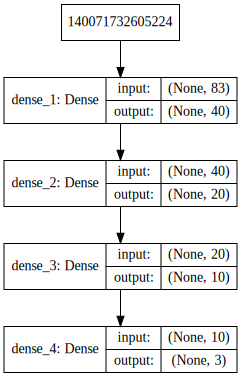

In [11]:
from keras.models import Model, Sequential
from keras import regularizers
from keras.layers import Input, Activation, Flatten, Dense, Concatenate, Dropout
from keras.optimizers import Adam
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import keras
import pydot as pyd
from keras.utils.np_utils import to_categorical
keras.utils.vis_utils.pydot = pyd
from keras.callbacks import EarlyStopping

def build_keras_model():
    model = Sequential()
    model.add(Dense(units=40, input_dim=columns, activation='relu', kernel_regularizer=regularizers.l2(0.0002)))
    model.add(Dense(units=20, activation='relu', kernel_regularizer=regularizers.l2(0.0002)))
    model.add(Dense(units=10, activation='relu', kernel_regularizer=regularizers.l2(0.0002)))
    model.add(Dense(units=3, activation='softmax', kernel_regularizer=regularizers.l2(0.0002)))
    model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0001), metrics=['accuracy']) # categorical_crossentropy
    return model

model = build_keras_model()

model.summary()
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [12]:
history = model.fit(x_train, to_categorical(y_train+1), batch_size=32, epochs=100, validation_split=0.04)

Instructions for updating:
Use tf.cast instead.
Train on 19705 samples, validate on 822 samples
Epoch 1/100
19705/19705 [==============================] - 5s 263us/step - loss: 0.2366 - acc: 0.3854 - val_loss: 0.2314 - val_acc: 0.4428
Epoch 2/100
19705/19705 [==============================] - 4s 216us/step - loss: 0.2220 - acc: 0.4789 - val_loss: 0.2204 - val_acc: 0.4659
Epoch 3/100
19705/19705 [==============================] - 5s 261us/step - loss: 0.2142 - acc: 0.5086 - val_loss: 0.2142 - val_acc: 0.4915
Epoch 4/100
19705/19705 [==============================] - 6s 322us/step - loss: 0.2098 - acc: 0.5202 - val_loss: 0.2116 - val_acc: 0.4927
Epoch 5/100
19705/19705 [==============================] - 6s 329us/step - loss: 0.2072 - acc: 0.5245 - val_loss: 0.2087 - val_acc: 0.4976
Epoch 6/100
19705/19705 [==============================] - 8s 424us/step - loss: 0.2054 - acc: 0.5272 - val_loss: 0.2076 - val_acc: 0.5049
Epoch 7/100
19705/19705 [==============================] - 5s 269us/st

19705/19705 [==============================] - 3s 162us/step - loss: 0.1952 - acc: 0.5386 - val_loss: 0.1982 - val_acc: 0.5122
Epoch 58/100
19705/19705 [==============================] - 3s 176us/step - loss: 0.1952 - acc: 0.5401 - val_loss: 0.1989 - val_acc: 0.5085
Epoch 59/100
19705/19705 [==============================] - 3s 156us/step - loss: 0.1952 - acc: 0.5397 - val_loss: 0.1974 - val_acc: 0.5231
Epoch 60/100
19705/19705 [==============================] - 3s 176us/step - loss: 0.1951 - acc: 0.5389 - val_loss: 0.1975 - val_acc: 0.5207
Epoch 61/100
19705/19705 [==============================] - 3s 157us/step - loss: 0.1951 - acc: 0.5389 - val_loss: 0.1981 - val_acc: 0.5122
Epoch 62/100
19705/19705 [==============================] - 3s 163us/step - loss: 0.1951 - acc: 0.5387 - val_loss: 0.1979 - val_acc: 0.5097
Epoch 63/100
19705/19705 [==============================] - 4s 180us/step - loss: 0.1949 - acc: 0.5405 - val_loss: 0.1978 - val_acc: 0.5097
Epoch 64/100
19705/19705 [=======

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

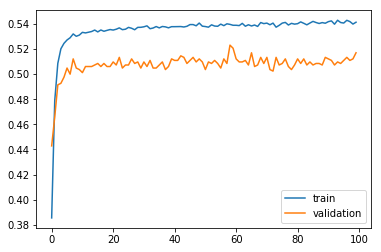

In [14]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show()

In [15]:
predictions = np.argmax(model.predict(x_test), axis=1)-1
accuracy = (predictions == y_test.values).sum() / y_test.values.shape[0]
print("Test set accuracy:", accuracy)

Test set accuracy: 0.5315666406858924


In [16]:
nn_test_pred = predictions

In [17]:
from sklearn.metrics import confusion_matrix
print("Y train")
print("Unique train labels:", np.unique(y_train.values))
print("Home win count:", (y_train==-1).sum())
print("Draw count:", (y_train==0).sum())
print("Away win count:", (y_train==1).sum())

Y train
Unique train labels: [-1  0  1]
Home win count: 9420
Draw count: 5217
Away win count: 5890


In [18]:
print("Train Prediction")
predictions = np.argmax(model.predict(x_train), axis=1)-1
print("Unique train labels:", np.unique(predictions))
print("Home win count:", (predictions==-1).sum())
print("Draw count:", (predictions==0).sum())
print("Away win count:", (predictions==1).sum())

Train Prediction
Unique train labels: [-1  0  1]
Home win count: 14729
Draw count: 850
Away win count: 4948


In [39]:
modelTester = ModelTester(model, x_train, y_train, x_test, y_test, train_bet, test_bet)
modelTester.get_train_confusion_matrix()

,pred home,pred draw,pred away
true home,8107,233,1080
true draw,3619,368,1230
true away,3003,249,2638


## Betting time...

In [41]:
modelTester.predict_home_wins_only_profit(data="train")

Agency B365, 	win amount: -358.02
Agency BW, 	win amount: -672.98
Agency IW, 	win amount: -1066.66
Agency LB, 	win amount: -809.56
Agency WH, 	win amount: -522.30
Agency SJ, 	win amount: 413.09
Agency VC, 	win amount: -158.62
Agency GB, 	win amount: 570.80
Agency BS, 	win amount: 566.73


In [42]:
modelTester.predict_bet_on_all_profit(data="train")

Agency B365, 	win amount: -2765.85
Agency BW, 	win amount: -4212.79
Agency IW, 	win amount: -5767.86
Agency LB, 	win amount: -4540.75
Agency WH, 	win amount: -4205.31
Agency SJ, 	win amount: -163.74
Agency VC, 	win amount: -1938.20
Agency GB, 	win amount: -347.36
Agency BS, 	win amount: -71.36


In [43]:
modelTester.always_bet_predicted_winner_profit()

Agency B365, 	win amount: 387.26
Agency BW, 	win amount: 311.34
Agency IW, 	win amount: 263.66
Agency LB, 	win amount: 293.84
Agency WH, 	win amount: 356.17
Agency SJ, 	win amount: 1118.29
Agency VC, 	win amount: 441.32
Agency GB, 	win amount: 1365.11
Agency BS, 	win amount: 1380.68


In [44]:
modelTester.bet_predicted_winner_with_threshold_profit("test", threshold=1)

Agency B365, 	win amount: 2019.36. Didn't bet on 67.95% of matches
Agency BW, 	win amount: 1920.51. Didn't bet on 68.73% of matches
Agency IW, 	win amount: 1832.97. Didn't bet on 68.73% of matches
Agency LB, 	win amount: 1864.13. Didn't bet on 69.25% of matches
Agency WH, 	win amount: 1983.02. Didn't bet on 67.79% of matches
Agency SJ, 	win amount: 2929.15. Didn't bet on 62.24% of matches
Agency VC, 	win amount: 2107.35. Didn't bet on 66.86% of matches
Agency GB, 	win amount: 3191.60. Didn't bet on 60.68% of matches
Agency BS, 	win amount: 3201.89. Didn't bet on 60.93% of matches


In [45]:
modelTester.predict_on_highest_return(threshold=2.5)

Agency B365, 	win amount: -1.00. Didn't bet on 99.86% of matches
Agency BW, 	win amount: -1.00. Didn't bet on 99.92% of matches
Agency IW, 	win amount: -1.00. Didn't bet on 99.94% of matches
Agency LB, 	win amount: -1.00. Didn't bet on 99.92% of matches
Agency WH, 	win amount: -1.00. Didn't bet on 99.92% of matches
Agency SJ, 	win amount: -37.00. Didn't bet on 97.80% of matches
Agency VC, 	win amount: -2.00. Didn't bet on 99.82% of matches
Agency GB, 	win amount: -48.00. Didn't bet on 97.06% of matches
Agency BS, 	win amount: -52.00. Didn't bet on 96.92% of matches


# Feature importance

In [25]:
from keras.wrappers.scikit_learn import KerasClassifier
import eli5
from eli5.sklearn import PermutationImportance

my_model = KerasClassifier(build_fn=build_keras_model, batch_size=32, epochs=100, validation_split=0.04, verbose=True)
my_model.fit(x_train, to_categorical(y_train+1))

perm = PermutationImportance(my_model, random_state=1).fit(x_train, to_categorical(y_train+1))


Train on 19705 samples, validate on 822 samples
Epoch 1/100
19705/19705 [==============================] - 4s 216us/step - loss: 0.2297 - acc: 0.4614 - val_loss: 0.2273 - val_acc: 0.4294
Epoch 2/100
19705/19705 [==============================] - 3s 176us/step - loss: 0.2193 - acc: 0.5037 - val_loss: 0.2189 - val_acc: 0.4781
Epoch 3/100
19705/19705 [==============================] - 4s 188us/step - loss: 0.2134 - acc: 0.5175 - val_loss: 0.2154 - val_acc: 0.4903
Epoch 4/100
19705/19705 [==============================] - 4s 182us/step - loss: 0.2104 - acc: 0.5231 - val_loss: 0.2135 - val_acc: 0.4927
Epoch 5/100
19705/19705 [==============================] - 4s 182us/step - loss: 0.2085 - acc: 0.5240 - val_loss: 0.2113 - val_acc: 0.4939
Epoch 6/100
19705/19705 [==============================] - 4s 190us/step - loss: 0.2071 - acc: 0.5272 - val_loss: 0.2104 - val_acc: 0.5012
Epoch 7/100
19705/19705 [==============================] - 4s 187us/step - loss: 0.2061 - acc: 0.5278 - val_loss: 0.20

19705/19705 [==============================] - 3s 157us/step - loss: 0.1956 - acc: 0.5402 - val_loss: 0.1998 - val_acc: 0.5061
Epoch 60/100
19705/19705 [==============================] - 3s 169us/step - loss: 0.1956 - acc: 0.5411 - val_loss: 0.1992 - val_acc: 0.5146
Epoch 61/100
19705/19705 [==============================] - 4s 178us/step - loss: 0.1955 - acc: 0.5406 - val_loss: 0.1994 - val_acc: 0.5146
Epoch 62/100
19705/19705 [==============================] - 4s 197us/step - loss: 0.1954 - acc: 0.5400 - val_loss: 0.1988 - val_acc: 0.5182
Epoch 63/100
19705/19705 [==============================] - 4s 198us/step - loss: 0.1954 - acc: 0.5412 - val_loss: 0.1999 - val_acc: 0.5073
Epoch 64/100
19705/19705 [==============================] - 4s 191us/step - loss: 0.1953 - acc: 0.5415 - val_loss: 0.1989 - val_acc: 0.5134
Epoch 65/100
19705/19705 [==============================] - 4s 196us/step - loss: 0.1952 - acc: 0.5425 - val_loss: 0.1987 - val_acc: 0.5134
Epoch 66/100
19705/19705 [=======

20527/20527 [==============================] - 1s 70us/step


20527/20527 [==============================] - 1s 72us/step


20527/20527 [==============================] - 2s 77us/step


In [26]:
eli5.show_weights(perm, feature_names = list(x_train), top=None)

Weight,Feature
0.0142 ± 0.0040,home_win_last_20_matches
0.0133 ± 0.0006,away_win_last_20_matches
0.0059 ± 0.0027,away_win_last_10_matches
0.0034 ± 0.0017,away_draw_last_10_matches
0.0026 ± 0.0014,home_buildUpPlaySpeedClass
0.0026 ± 0.0008,home_defenceDefenderLineClass
0.0025 ± 0.0013,away_buildUpPlayDribblingClass
0.0023 ± 0.0002,away_chanceCreationPositioningClass
0.0023 ± 0.0009,home_draw_last_10_matches
0.0023 ± 0.0010,home_buildUpPlayDribblingClass


In [27]:
df = x_train.copy()
df['label'] = y_train
display(df.corr()['label'][:].sort_values(ascending=False))

label                                  1.000000
IWH                                    0.322357
BWH                                    0.319553
B365H                                  0.317267
LBH                                    0.314787
WHH                                    0.314611
VCH                                    0.306969
SJH                                    0.274542
away_win_last_20_matches               0.262226
GBH                                    0.253144
BSH                                    0.250785
away_win_last_10_matches               0.236012
away_win_last_5_matches                0.189204
away_win_last_3_matches                0.145349
home_buildUpPlayPositioningClass       0.091994
home_chanceCreationPositioningClass    0.088306
away_defencePressure                   0.072488
home_buildUpPlayPassing                0.061508
home_buildUpPlayPassingClass           0.059198
home_draw_last_20_matches              0.051593
away_chanceCreationShootingClass       0

# Test accuary with decision tree

In [28]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn import svm # https://scikit-learn.org/stable/modules/svm.html

In [29]:
svmModel = svm.SVC(gamma='auto', kernel='linear') # Linear better than rbf a bit
svmModel.fit(X=x_train, y=y_train)
svm_predicted_class = svmModel.predict(x_test)
print("SVM test acc:", ((svm_predicted_class == y_test).sum() / y_test.shape)[0])

SVM test acc: 0.5278643803585347


In [30]:
print(confusion_matrix(y_test, svm_predicted_class))

[[2143    0  211]
 [1063    0  237]
 [ 912    0  566]]


In [31]:
rfc = RandomForestClassifier(max_depth=50, n_estimators=500)
rfc.fit(X=x_train, y=y_train)
rf_predicted_class = rfc.predict(x_test)
print("Random forest test acc:", ((rf_predicted_class == y_test).sum() / y_test.shape)[0])

Random forest test acc: 0.5077942322681216


In [32]:
print(confusion_matrix(y_test, rf_predicted_class))

[[1775  187  392]
 [ 784  164  352]
 [ 648  163  667]]


## Predict B365

In [33]:
odds = pd.concat([test_bet['B365H'], test_bet['B365D'], test_bet['B365A']], axis=1)
b365_predictions = np.argmin(odds.values, axis=1) - 1

#### Confusion B365 vs test

In [34]:
pd.DataFrame(confusion_matrix(y_test, b365_predictions, labels=[-1, 0, 1]), 
             index=['true home', 'true draw', 'true away'], columns=['b365 home', 'b365 draw', 'b365 away'])

,b365 home,b365 draw,b365 away
true home,2075,0,279
true draw,973,6,321
true away,868,1,609


#### Confusion B365 vs NN

In [35]:
pd.DataFrame(confusion_matrix(nn_test_pred, b365_predictions, labels=[-1, 0, 1]), 
             index=['NN home', 'NN draw', 'NN away'], columns=['b365 home', 'b365 draw', 'b365 away'])

,b365 home,b365 draw,b365 away
NN home,3469,4,200
NN draw,139,2,54
NN away,308,1,955
